In [16]:
import numpy as np
import pandas as pd
import zipfile
import os
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from keras.models import model_from_json
import time

In [35]:
IMG_SIZE = (300, 300)

train_image_data = ImageDataGenerator(
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range=0.2,
    horizontal_flip = True,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_image_data.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/train/',
                                                 target_size = IMG_SIZE,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/val/',
    target_size=IMG_SIZE,
    batch_size=16,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('../input/chest-xray-pneumonia/chest_xray/test/',
                                            target_size = IMG_SIZE,
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [36]:
modeloCNN = Sequential()

modeloCNN.add(Conv2D(16, (3, 3), activation="relu", input_shape=(300, 300, 3)))

modeloCNN.add(MaxPooling2D(pool_size = (2, 2)))

modeloCNN.add(Conv2D(32, (3, 3), activation="tanh"))

modeloCNN.add(MaxPooling2D(pool_size = (2, 2)))

modeloCNN.add(Conv2D(32, (3, 3), activation="tanh"))

modeloCNN.add(MaxPooling2D(pool_size = (2, 2)))

modeloCNN.add(Conv2D(64, (3, 3), activation="tanh"))

modeloCNN.add(MaxPooling2D(pool_size = (2, 2)))

modeloCNN.add(Flatten())

modeloCNN.add(Dense(activation = 'relu', units = 128))
modeloCNN.add(Dense(activation = 'sigmoid', units = 1))

modeloCNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
modeloCNN.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 35, 35, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 33, 33, 64)       

In [39]:
inicio = int(round(time.time() * 1000))

history = cnn.fit_generator(
    training_set,
    steps_per_epoch=training_set.samples//training_set.batch_size,
    epochs=25,
    validation_data=validation_generator, validation_steps=validation_generator.samples//validation_generator.batch_size,
    verbose=1)

final  = int(round(time.time() * 1000))
tiempo_total = ((final-inicio)/1000)/60
print(tiempo_total)

Epoch 1/25
163/163 [==============================] - 157s 963ms/step - loss: 0.1546 - accuracy: 0.9392 - val_loss: 0.6164 - val_accuracy: 0.6875
Epoch 2/25
163/163 [==============================] - 159s 973ms/step - loss: 0.1487 - accuracy: 0.9383 - val_loss: 0.6180 - val_accuracy: 0.6875
Epoch 3/25
163/163 [==============================] - 159s 975ms/step - loss: 0.1364 - accuracy: 0.9507 - val_loss: 0.5929 - val_accuracy: 0.6875
Epoch 4/25
163/163 [==============================] - 156s 960ms/step - loss: 0.1398 - accuracy: 0.9438 - val_loss: 0.3117 - val_accuracy: 0.9375
Epoch 5/25
163/163 [==============================] - 156s 957ms/step - loss: 0.1293 - accuracy: 0.9526 - val_loss: 0.3143 - val_accuracy: 0.8750
Epoch 6/25
163/163 [==============================] - 157s 966ms/step - loss: 0.1331 - accuracy: 0.9450 - val_loss: 0.5858 - val_accuracy: 0.7500
Epoch 7/25
163/163 [==============================] - 154s 943ms/step - loss: 0.1286 - accuracy: 0.9511 - val_loss: 0.5841 -

In [40]:
def guardar_pesos(nombre_archivo='pesos.h5'):
    modeloCNN.save_weights(nombre_archivo)

def guardar_modelo(nombre_archivo='modelo.json'):
    modelo_json = modeloCNN.to_json()
    with open(nombre_archivo, "w") as json_file:
        json_file.write(modelo_json)
        
guardar_pesos()
guardar_modelo()

In [42]:
accuracy_training = history.history['accuracy']
accuracy_testing = history.history['val_accuracy']
epochs = 25

In [48]:
acc_training = np.array(accuracy_training)
acc_testing = np.array(accuracy_testing)

In [52]:
dataframe_accuracies = pd.DataFrame(list(zip(acc_training, acc_testing)), columns=['ACC_Training', 'ACC_Testing'])

In [55]:
dataframe_accuracies.head()
dataframe_accuracies.to_csv('dataframe_accuracies.csv')

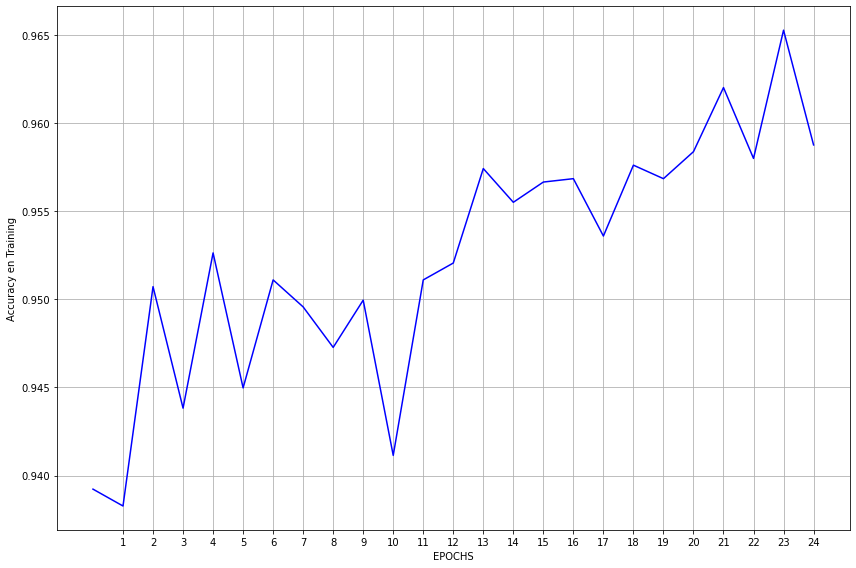

In [43]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.plot(accuracy_training, color='b', label="Training accuracy")
plt.xticks(np.arange(1, epochs, 1))
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy en Training')
plt.tight_layout()
plt.show()

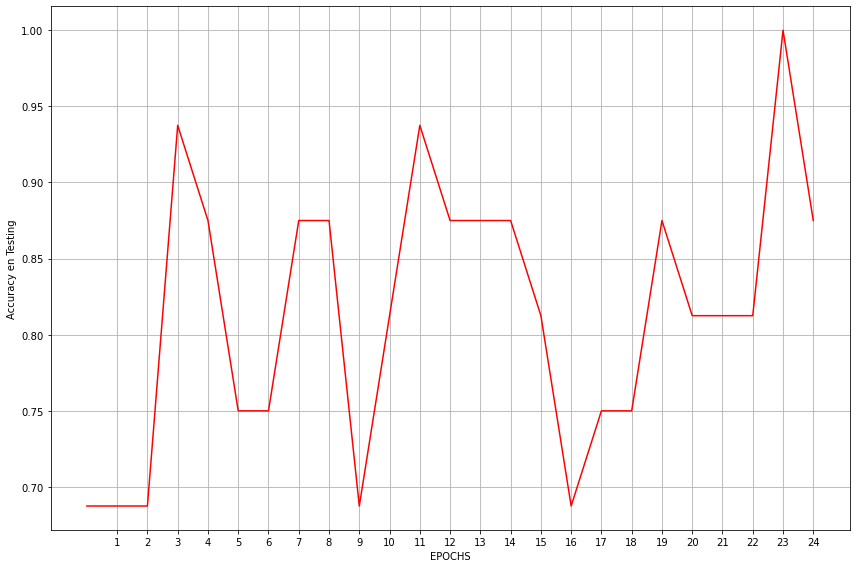

In [44]:
plt.rcParams["figure.figsize"] = (12,8)
plt.grid()
plt.plot(accuracy_testing, color='r')
plt.xticks(np.arange(1, epochs, 1))
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy en Testing')
plt.tight_layout()
plt.show()